# Week 2

In [1]:
from Algs_scratch import *

In [2]:
def func_x(x):
    return - x**5 - 2*x + 1

In [3]:
%%time
bisection(-2, 2, func_x)


CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11.4 µs


In [4]:
%%time
secant_method(func_x, 0, 0.2)

CPU times: user 34 µs, sys: 6 µs, total: 40 µs
Wall time: 45.8 µs


(0.486389035934543, 6)

In [5]:
%%time
Newton_Raphson(func_x, 0.2)

CPU times: user 21 µs, sys: 4 µs, total: 25 µs
Wall time: 30 µs


(0.4863890252475381, 8)

# Week 3

## bruteforce or scipy.optimize

In [6]:
import numpy as np
import scipy.optimize as opt
from scipy.optimize import minimize


In [7]:
def f(x):
    return x**6 - x**5 + x**4 - 7*x**3 + x**2 + x -5

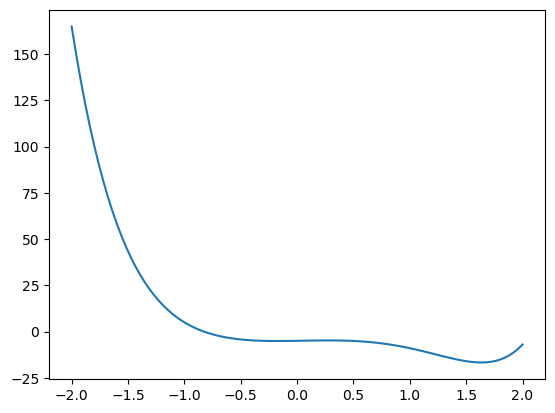

In [8]:
def matplotlib_display():
    import matplotlib.pyplot as plt 
    x = np.linspace(-2, 2, 100)
    plt.plot(x, f(x))
    plt.show()
matplotlib_display()

In [9]:
minfx = minimize(f, 0, method='BFGS', options={'disp': True})
minimizescalar = opt.minimize_scalar(f, method='brent')
print(minfx)


Optimization terminated successfully.
         Current function value: -5.105749
         Iterations: 5
         Function evaluations: 14
         Gradient evaluations: 7
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -5.105749483553248
        x: [-1.729e-01]
      nit: 5
      jac: [-5.960e-08]
 hess_inv: [[ 1.024e-01]]
     nfev: 14
     njev: 7


In [10]:
%%time
def df(x):
    return 6*x**5 - 5*x**4 + 4*x**3 - 21*x**2 + 2*x + 1
    
minfx = opt.root_scalar(df, method='newton', x0=1.4)
print(f"""
    Newton-Raphson: 
    {minfx}
    """)


    Newton-Raphson: 
          converged: True
           flag: converged
 function_calls: 14
     iterations: 7
           root: 1.6351292084233693
    
CPU times: user 4.51 ms, sys: 90 µs, total: 4.6 ms
Wall time: 4 ms


In [11]:
def get_derivative_f(x, func, tol=1e-6):
    return (func(x + tol) - func(x-tol)) / (2*tol)

In [12]:
%%time
def BruteForce(func, range, steps, tol=1e-6):
    x = np.linspace(range[0], range[1], steps)
    y = func(x)
    min_index = np.argmin(y)
    max_index = np.argmax(y)
    x_min = x[min_index]
    x_max = x[max_index]
    return {
        'min': {
            'x': x_min,
            'y': y[min_index]
        },
        'max': {
            'x': x_max,
            'y': y[max_index]
        }
    }

BruteForce(f, [-10,10], 1000)

CPU times: user 2.96 ms, sys: 0 ns, total: 2.96 ms
Wall time: 3.11 ms


{'min': {'x': 1.631631631631631, 'y': -16.720848456833032},
 'max': {'x': -10.0, 'y': 1117085.0}}

## x = [x1,x2]

$$
x \in \left[ 0, 1 \right]^2
$$

In [13]:
A = np.random.rand(2,2)
C = np.random.rand(2,1)
D = np.random.rand(1,1)
print(A)
print(C)
print(D)
X = np.random.rand(2,1)

[[0.42284959 0.05102574]
 [0.77477864 0.74767212]]
[[0.20417674]
 [0.93377741]]
[[0.10143165]]


In [14]:
def f(x):
    return x.T @ A @ x + C.T @ x + D

def test():
    x=np.random.rand(2,1)
    return x, f(x)

def df(x, tol=1e-6):
    return ((f(x + tol) - f(x-tol)) / (2*tol))
df(X).shape

(1, 1)

In [15]:
import scipy.misc as misc
misc.derivative(f, X)

/tmp/ipykernel_18568/432769170.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  misc.derivative(f, X)


array([[4.1926127]])

In [16]:
minfx = opt.minimize(f, X.reshape(-1), method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: -0.314634
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8


# Week4

## find f'

In [17]:
n = np.random.randint(1, 10)
n


2

In [18]:
params = np.random.rand(n)
params

array([0.47780145, 0.27068977])

In [19]:
coordinates = []
for i in range(n):
    x = np.random.randint(0,10) 
    y = np.random.randint(0,10)
    coordinates.append((x,y))
coordinates = np.array(coordinates)
coordinates

array([[1, 3],
       [9, 7]])

[2.5 0.5]


/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


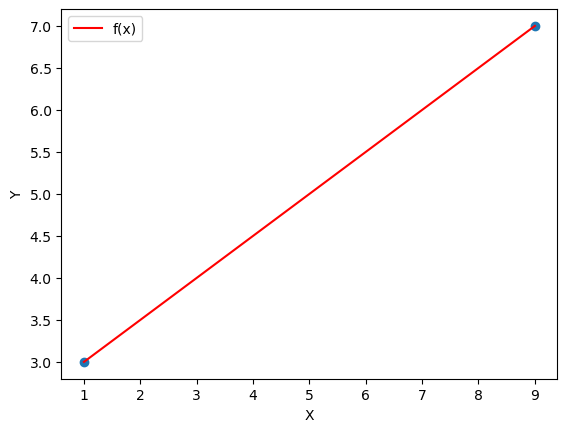

In [20]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x = coordinates[:, 0]
y = coordinates[:, 1]

def target_function(x, *params):
    # result_f = 0
    # for i in range(len(params)):
    #     result_f += params[i] * x**i
    return sum([params[i] * x**i for i in range(len(params))])

fit_params, pcov = curve_fit(target_function, x, y, p0=params.tolist())
print(fit_params)

x_new = np.linspace(min(x), max(x), 100)

y_new = target_function(x_new, *fit_params)    # Create an coordinate


plt.scatter(x, y)
plt.plot(x_new, y_new, label='f(x)', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [21]:
def df(x, tol = 1e-6):
    return ((target_function((x + tol), *fit_params) - target_function((x-tol), *fit_params)) / (2*tol))

In [22]:
df(1)

0.500000000069889

## Homework

ktra co phai toi uu loi khong (Check is convex)
sd phuong phap roi rac hoa de giai
$$
    f_i(x_i) = x_i.\log_2{(1+\frac{a_i}{x_i})} + \frac{1}{r_i}.\log_2{(1 + b_i.x_i)}
$$

hai ham thanh phan deu phu thuoc vao 1 bien

=> ap dung tong hai ham loi la ham loi

=> chung minh cac ham thanh phan la loi

ddf>0 la ham loi

In [23]:
import numpy as np
from scipy.optimize import minimize

def f(x, a, r, b):
    return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)

def df(x, a, r, b, tol=1e-6):
    return ((f(x + tol, a, r, b) - f(x-tol, a, r, b)) / (2*tol))

def df2(x, a, r, b, tol=1e-6):
    return ((df(x + tol, a, r, b) - df(x-tol, a, r, b)) / (2*tol))

a = np.random.rand()
r = np.random.rand()
b = np.random.rand()

x0 = np.random.rand()
x0
def hessian_matrix(x, a, r, b, tol=1e-6):
    hessian = np.zeros((1, 1))
    f_x = df(x, a, r, b, tol)
    f_x_plus_h = df(x + tol, a, r, b, tol)
    f_x_minus_h = df(x - tol, a, r, b, tol)
    second_derivative = (f_x_plus_h - 2 * f_x + f_x_minus_h) / (tol ** 2)
    hessian[0, 0] = second_derivative
    return hessian

hessian_matrix_result = hessian_matrix(x0, a, r, b)
print("Hessian Matrix:")
print(hessian_matrix_result)
minfx = minimize(f, x0, args=(a, r, b), method='BFGS', options={'disp': True})
minfx

Hessian Matrix:
[[166.53345369]]
         Current function value: nan
         Iterations: 2
         Function evaluations: 246
         Gradient evaluations: 123


/tmp/ipykernel_18568/1492801064.py:5: RuntimeWarning: invalid value encountered in log2
  return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)
/tmp/ipykernel_18568/1492801064.py:5: RuntimeWarning: invalid value encountered in log2
  return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)
/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: nan
        x: [-1.860e+05]
      nit: 2
      jac: [       nan]
 hess_inv: [[-1.663e+01]]
     nfev: 246
     njev: 123

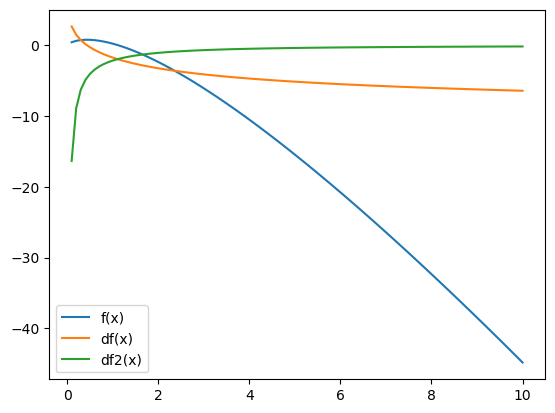

In [24]:
def visualize():
    import matplotlib.pyplot as plt
    x = np.linspace(0.1, 10, 100)
    plt.plot(x, f(x, a, r, b))
    plt.plot(x, df(x, a, r, b))
    plt.plot(x, df2(x, a, r, b))
    plt.legend(['f(x)', 'df(x)', 'df2(x)'])
    plt.show()
visualize()

## multi variables

In [25]:
n = np.random.randint(1, 10)
print(n)
# n =1
x0 = np.random.rand(n)
a = np.random.rand(n)
r = np.random.rand(n)
b = np.random.rand(n)
print(x0)

def d_multi_variables(x,a,r,b):
    return np.sum([f(xi,a,r,b) for xi in x])

cons = [{'type': 'ineq', 'fun': lambda: d_multi_variables < 1.0},
        {'type': 'ineq', 'fun': lambda: d_multi_variables > 0.001}]

d_multi_variables(x0,a,r,b)
minfx = minimize(d_multi_variables, x0, args=(a, r, b), method='BFGS'
                 , options={'disp': True}, constraints=cons)
minfx

9
[0.15265241 0.11991527 0.24979016 0.60525896 0.26494272 0.30786854
 0.72003908 0.54767238 0.94615627]


/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method BFGS cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/tmp/ipykernel_18568/1492801064.py:5: RuntimeWarning: invalid value encountered in log2
  return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)


         Current function value: nan
         Iterations: 1
         Function evaluations: 1120
         Gradient evaluations: 112


/tmp/ipykernel_18568/1492801064.py:5: RuntimeWarning: invalid value encountered in log2
  return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)
/tmp/ipykernel_18568/1492801064.py:5: RuntimeWarning: invalid value encountered in log2
  return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)
/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: nan
        x: [-4.238e+02 -5.417e+02 -1.789e+02  2.795e+02 -1.491e+02
            -7.284e+01  3.724e+02  2.265e+02  5.202e+02]
      nit: 1
      jac: [       nan        nan        nan        nan        nan
                   nan        nan        nan        nan]
 hess_inv: [[1 0 ... 0 0]
            [0 1 ... 0 0]
            ...
            [0 0 ... 1 0]
            [0 0 ... 0 1]]
     nfev: 1120
     njev: 112

# Week5

$$
    \sum_{i-1}^M ||f_i{(x_i)}||_p \\
\max  a^TX \\
\text{s.t } Ax <= b
$$

In [26]:
import numpy as np
def f(x):
    return x**2 + 1

n = np.random.randint(1,10)
print("Dimesion: ", n)
X = np.random.rand(n)
print("Variables",X)
func_values = np.array([f(x) for  x in X])
print("Value of objective function",sum(func_values))
p = np.random.randint(1,10)
print("Norm p: ",p)

def Obj_func(X, func):
    return np.sum([func(x) for x in X])
print(Obj_func(X,f))



Dimesion:  3
Variables [0.74150821 0.70104762 0.54073006]
Value of objective function 4.333691193711074
Norm p:  2
4.333691193711074


In [27]:
np.linalg.norm(f(X),p)

2.5093290297336366

# Week6

## Solve
$$\text{min }x^TQx$$ 
$$\text{st } Ax \leq b$$

In [40]:
n = np.random.randint(1,10)
print("Dimesion: ", n)

x = np.random.rand(n)
print("Variables",x)

Q = np.random.rand(n,n)

def checkQ(Q):
    if np.all(np.linalg.eigvals(Q) >= 0):
        return True
    else:
        return False
while not checkQ(Q):
    Q = np.random.rand(n,n)
# print(f"Q is (semi) positive matrix {np.linalg.eigvals(Q)}")
def f(x):
    return x.T @ Q @ x

f(x)

Dimesion:  3
Variables [0.38353664 0.38086905 0.95258948]


1.6089282378350382

In [62]:
def solve(x, package):
    if package == 'scipy':
        cons = 
        minfx = minimize(f, x, method='SLSQP', options={'disp': True})
        return minfx
    elif package == 'cvxpy':
        import cvxpy as cp
        x = cp.Variable(n)
        objective = cp.Minimize(f(x))
        constraints = [A@x - b <= 0]
        prob = cp.Problem(objective, constraints)
        result = prob.solve()
        return result
    elif package == 'gekko':
        from gekko import GEKKO
        m = GEKKO()
        x = m.Var(value=x)
        m.Minimize(f(x))
        m.Equations([A@x - b <= 0])
        m.solve(disp=False)
        return x.value
    else:
        raise ValueError("Package is not supported")
    
    
solve(x, A, b, 'scipy')
    

Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 1205
            Gradient evaluations: 100


/tmp/ipykernel_18568/92574120.py:18: RuntimeWarning: overflow encountered in matmul
  return x.T @ Q @ x
/tmp/ipykernel_18568/92574120.py:18: RuntimeWarning: invalid value encountered in matmul
  return x.T @ Q @ x
/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


 message: Iteration limit reached
 success: False
  status: 9
     fun: nan
       x: [       nan        nan        nan]
     nit: 100
     jac: [       nan        nan        nan]
    nfev: 1205
    njev: 100